# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

The problem is to identify and classify vocal responses (yes or no)

## Learning Objectives

At the end of the experiment, you will be able to :

* Obtain the mfcc features from audio samples 
* Train the classifier with these mfcc features
* Classify the audio samples into 'yes' and 'no'

## Dataset 

### Description
The Train dataset contains 2661 audio samples and the test dataset contains 650 audio samples with the extension .wav.

Each audio sample has utterances 'yes' or 'no'

The naming convention of the sample is of the format 'yes_no/' followed by '10' (representing 'yes') or '11' (representing 'no')

Ex:   

        'yes_no/10_g38_46.wav'    ---> yes audio sample
        'yes_no/11_G6_11.wav'     ---> no audio sample



## Domain Information

When we listen to an audio sample it changes constantly. This means that speech is non-stationary signal. Therefore, normal signal processing techniques cannot be applied to get features from audio. However, if the speech signal is observed using a very small duration window, the speech content in that small duration appears to be  stationary. That brought in the concept of short-time processing of speech. 

MFCC is a technique for short-time processing of speech. 

## AIML Technique

In this short-time processing technique MFCC, a small duration window (say 25 milli sec) is considered for processing of the audio samples at a time. This small duration is called a frame. Now, for each of the frames, MFCC features are computed which give a compact representation of the audio samples. A spectrogram is computed for audio samples which gives a heat map of frequencies vs time from the series of spectral vectors generated from audio samples.

This representation is obtained by keeping in mind that humans are much better at grasping small changes in the audio at low frequencies than audio at high frequencies. So mel-scale converts high frequencies to human graspable frequencies. 

#### Keywords

* Spectrogram
* Mel-frequency cepstral coefficients (MFCC)


## Grading = 20 Marks

## Setup Steps

In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
def setup():
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/yes_no_Testdata.zip")
    ipython.magic("sx unzip yes_no_Testdata.zip")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/yes_no.zip")
    ipython.magic("sx unzip yes_no.zip")
    print ("Setup completed successfully")
    return

setup()






Setup completed successfully


In [0]:
ls

sample_data/  yes_no/  yes_no_Testdata/  yes_no_Testdata.zip  yes_no.zip


### Importing Required Packages

In [0]:
import os

import warnings
warnings.filterwarnings("ignore")

# Math
import numpy as np
from scipy import signal
from scipy.io import wavfile
import librosa

# Visualization
import matplotlib.pyplot as plt
import librosa.display

from matplotlib.pyplot import *
%matplotlib inline

# Import glob to perform pattern matching to find files
import glob

# Import train_test_split to split the data into train and test sets
from sklearn.model_selection import train_test_split

# Import MLPClassifier to be trained on features of wav files
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from datetime import datetime
import seaborn as sns

## **Stage 1:** Extract the Audio files

### 2Marks -> Extract the Audio files and get the labels from yes_no folder

1. Use Glob library methods for traversing the file system and returning Audio files that matched the defined glob pattern. 

   Hint: [Glob Library](https://docs.python.org/3/library/glob.html)

2. Split the file name to get the labels from yes_no folder, where '10' (representing 'yes') and '11' (representing 'no')

In [0]:
# YOUR CODE HERE
train_files = glob.glob('yes_no/*.wav')
print(len(train_files))

2661 650


In [0]:
train_labels = []

for file in train_files:
  if file[7:9] == '10':
    train_labels.append(1)
  if file[7:9] == '11':
    train_labels.append(0)

In [0]:
len(train_labels), len(test_labels)

(2661, 650)

In [0]:
train_labels = np.asarray(train_labels)
train_labels.shape

((2661,), (650,))

In [0]:
# import IPython.display as ipd
# ipd.Audio(train_files[411])

## **Stage 2:** Extract the MFCC features for all Audio files

### 4 Marks -> a) Convert the audio files to obtain mfcc features

1. Load the audio files with the sampling rate 7000.

   Hint: [Load](https://librosa.github.io/librosa/generated/librosa.core.load.html)

2. Get the MFCC features using a pre-computed log-power Mel spectrogram

  Hint: [MFCC features with n_mfcc=30, n_mels=128](https://librosa.github.io/librosa/generated/librosa.feature.mfcc.html)  

In [0]:
def extract_mfcc_features(files,sr,n_mels,n_mfcc):
  feature_list = []
  for file in files:
    x,sr = librosa.load(file,sr)
    S = librosa.feature.melspectrogram(y=x,sr=sr,n_mels=n_mels)
    log_S = librosa.power_to_db(S)
    mfcc = librosa.feature.mfcc(S=log_S,n_mfcc=n_mfcc)
    feature_list.append(mfcc)
  return feature_list

In [0]:
# Extract features for each sample as per the steps given. 

n_mels = 128
n_mfcc = 30
sampling_rate = 7000

train_set = extract_mfcc_features(train_files,sampling_rate,n_mels,n_mfcc)

### Do not make any changes to the below function as mentors will also use same function

In [0]:
# for each of the frames, MFCC features are computed which give a compact representation of the audio samples. 
def get_mfcc(features, frames = 15):
  if features.shape[1] < frames :
        features = np.hstack((features, np.zeros((n_mfcc, frames - features.shape[1]))))
  elif features.shape[1] > frames:
        features = features[:, :frames]
  return features

In [0]:
for i in range(0,len(train_set)):
  train_set[i] = get_mfcc(train_set[i])

### 2Marks -> b) Extract mfcc features for all the samples

**Hint:** Convert the extracted MFCC features to an array and reshape from 2661 * 30 * 15 to 2661 * 450

In [0]:
# YOUR CODE HERE
train_features = np.asarray(train_set)
train_features.shape

((2661, 30, 15), (650, 30, 15))

In [0]:
train_features = train_features.reshape(2661,450)
train_features.shape

## **Stage 3:** Visualize MFCC features

### 3Marks -> Plot MFCC features for the below mentioned wave files to understand the difference between the original and original with noise data


  1. 10_b15_46.wav
  2. 10_t26n02m_106.wav
  3. 11_b21_107.wav
  4. 11_t10n3m_47.wav

**Hint:** [MFCC features plot](https://librosa.github.io/librosa/generated/librosa.feature.mfcc.html)

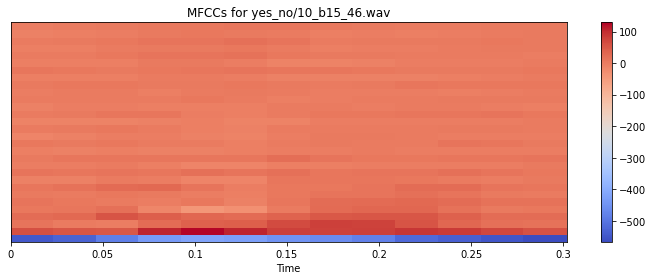

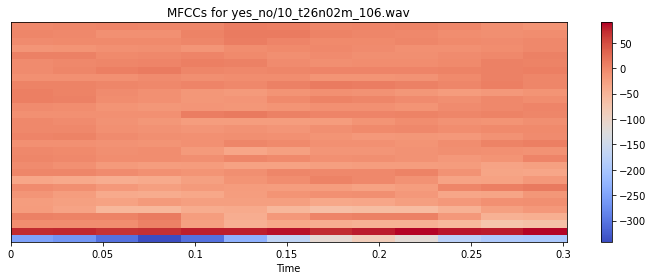

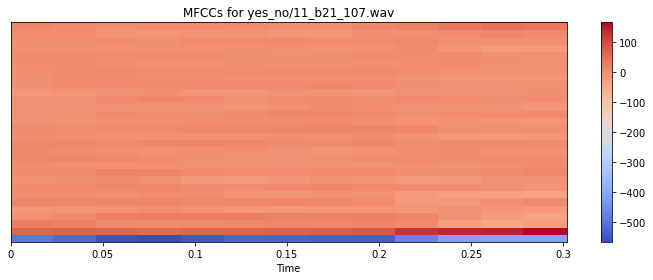

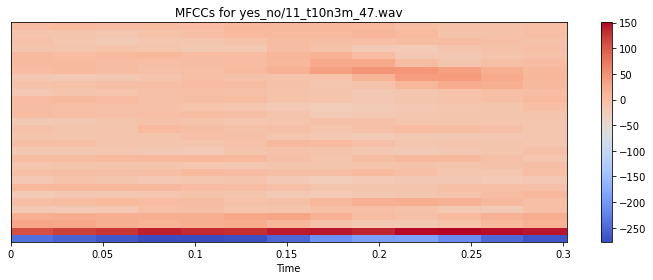

In [0]:
# YOUR CODE HERE
# Display MFCC features
file_1 = 'yes_no/10_b15_46.wav'
file_2 = 'yes_no/10_t26n02m_106.wav'
file_3 = 'yes_no/11_b21_107.wav'
file_4 = 'yes_no/11_t10n3m_47.wav'

def display_mfcc_features(audio_file,sr = 7000, n_mels=128, n_mfcc=30):
    x,sr = librosa.load(audio_file,sr)
    S = librosa.feature.melspectrogram(y=x,sr=sr,n_mels=n_mels)
    log_S = librosa.power_to_db(S)
    mfccs = librosa.feature.mfcc(S=log_S,n_mfcc=n_mfcc)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs for {audio_file}')
    plt.tight_layout()
    plt.show()

file_list = [file_1, file_2, file_3, file_4]

for a_file in file_list:
  display_mfcc_features(a_file)

## **Stage 4:** Split the mfcc features into train and test sets and classify using MLP

### Expected Accuracy : 85%

1. Split the data into train and test

2. Classify using MLP. 

3. Adjust the hyperparameters to get more perfect performance

### 4Marks -> Classify using MLP with different hyperparameters and identify the best MLP

[SKlearn MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)


In [0]:
#split the train features in train and validation sets
X_train, X_val, y_train, y_val =  train_test_split(train_features, train_labels, test_size=0.2, random_state=4)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2128, 450), (533, 450), (2128,), (533,))

In [0]:
#function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a ,solver= s ,hidden_layer_sizes = h,max_iter = 5000 ,learning_rate = 'constant',learning_rate_init=lr)
    return clf 
#function to calculate the accuracy
def accuracy(actual,predicted):
    return accuracy_score(actual,predicted)

In [0]:
# Activation functions 
activation = ["identity","logistic","tanh","relu"]
#solvers: The following are the methods by which your weights get updated.
solvers = ["lbfgs","sgd","adam"]
#learning rate
learning_rate = [0.0001,0.001,0.01,0.1]
#hidden layers
hidden_layers = [(300),(300,200),(200),(200,100)]

In [0]:
# accuracy_df = pd.DataFrame(columns=['Activation','Solver', 'lr', 'Hidden Layers', 'Accuracy', 'Time'])

In [0]:
# YOUR CODE HERE
# Identify the MLP which is giving the best classification
# for act in activation:
#   print('Activation: ', act,end='. ')
#   for solver in solvers:
#     print('Solver: ', solver,end='. ')
#     for lr in learning_rate:
#       print('Learning Rate: ', lr,end='. ')
#       for hl in hidden_layers:
#         print('Hidden Layers: ', hl)
#         start_time = datetime.now()
#         #calling the mlp function with random hyper paramters
#         clf = mlp(act,solver,hl,lr)
#         #Fitting the data into model
#         clf.fit(X_train,y_train)
#         ## Predicting the values on trained model using train data
#         y_pred = clf.predict(X_val)
#         #Calculating the train accuracy
#         time_taken = datetime.now() - start_time
#         accuracy_df = accuracy_df.append({'Activation': act, 'Solver': solver, 'lr': lr, \
#                             'Hidden Layers': hl, 'Accuracy': accuracy(y_val,y_pred),\
#                             'Time': time_taken},ignore_index=True)


Activation:  identity. Solver:  lbfgs. Learning Rate:  0.0001. Hidden Layers:  300
Hidden Layers:  (300, 200)
Hidden Layers:  200
Hidden Layers:  (200, 100)
Learning Rate:  0.001. Hidden Layers:  300
Hidden Layers:  (300, 200)
Hidden Layers:  200
Hidden Layers:  (200, 100)
Learning Rate:  0.01. Hidden Layers:  300
Hidden Layers:  (300, 200)
Hidden Layers:  200
Hidden Layers:  (200, 100)
Learning Rate:  0.1. Hidden Layers:  300
Hidden Layers:  (300, 200)
Hidden Layers:  200
Hidden Layers:  (200, 100)
Solver:  sgd. Learning Rate:  0.0001. Hidden Layers:  300
Hidden Layers:  (300, 200)
Hidden Layers:  200
Hidden Layers:  (200, 100)
Learning Rate:  0.001. Hidden Layers:  300
Hidden Layers:  (300, 200)
Hidden Layers:  200
Hidden Layers:  (200, 100)
Learning Rate:  0.01. Hidden Layers:  300
Hidden Layers:  (300, 200)
Hidden Layers:  200
Hidden Layers:  (200, 100)
Learning Rate:  0.1. Hidden Layers:  300
Hidden Layers:  (300, 200)
Hidden Layers:  200
Hidden Layers:  (200, 100)
Solver:  adam. 

In [0]:
# accuracy_df

,Activation,Solver,lr,Hidden Layers,Accuracy,Time
0,identity,lbfgs,0.0001,300,0.536585,00:00:00.783896
1,identity,lbfgs,0.0001,"(300, 200)",0.538462,00:00:00.617734
2,identity,lbfgs,0.0001,200,0.544090,00:00:00.642913
3,identity,lbfgs,0.0001,"(200, 100)",0.752345,00:00:04.729865
4,identity,lbfgs,0.0010,300,0.763602,00:00:03.374651
...,...,...,...,...,...,...
187,relu,adam,0.0100,"(200, 100)",0.819887,00:00:09.298808
188,relu,adam,0.1000,300,0.463415,00:00:03.739000
189,relu,adam,0.1000,"(300, 200)",0.463415,00:00:02.170509
190,relu,adam,0.1000,200,0.463415,00:00:01.125131


In [0]:
# accuracy_df[accuracy_df['Accuracy'] == max(accuracy_df['Accuracy'])]

,Activation,Solver,lr,Hidden Layers,Accuracy,Time
86,logistic,adam,0.001,200,0.863039,00:00:16.208989


In [0]:
# accuracy_df.to_excel('Accuracy.xlsx')

In [56]:
start_time = datetime.now()
clf = mlp('logistic','adam',(200),0.001)

#Fitting the data into model
clf.fit(X_train,y_train)

## Predicting the values on trained model using train data
y_pred = clf.predict(X_val)

#Calculating the train accuracy
time_taken = datetime.now() - start_time
print(f'Accuracy: {accuracy(y_val,y_pred)}')
print(f'Time elapsed: {time_taken}')

Accuracy: 0.8686679174484052
Time elapsed: 0:00:14.631506


### 1Mark -> Will the classification error of test data always decreases when you increase the number of hidden layers in a Multi Layer Perceptron.

In [0]:
# YOUR TEXT HERE
# No. As the number of hidden layers increases, overfitting happens and there is a very good probability
# that the accuracy might go down

## **Stage 5:** Test Evaluation
### Expected Accuracy : 80%

### 4 Marks -> Evaluate with the given test data 

1.  Get the audio files and labels of the Test data

2.  Extract the mfcc features of the Test data

3.  Pass through the model and verify the accuracy

In [0]:
# YOUR CODE HERE for extracting the audio files and labels
test_files = glob.glob('yes_no_Testdata/*.wav')

test_labels = []
for file in test_files:
  if file[16:18] == '10':
    test_labels.append(1)
  if file[16:18] == '11':
    test_labels.append(0)

print(len(test_files), len(test_labels))

650 650


In [0]:
# YOUR CODE HERE for getting the mfcc features of Test data. Note: Use get_mfcc function for getting the compact representation of the features
test_set = extract_mfcc_features(test_files,sampling_rate,n_mels,n_mfcc)

for i in range(0,len(test_set)):
  test_set[i] = get_mfcc(test_set[i])

In [0]:
# Convert the features of test data to array and reshape

test_features = np.asarray(test_set)
test_features = test_features.reshape(650,450)
test_features.shape

(650, 450)

In [57]:
# Give the model name (Do not fit the model)
test_predict = clf.predict(test_features) # Give the returned test features here for prediction
score = accuracy_score(test_predict, test_labels)
print(score)

0.8246153846153846
